# Applying a two-port calibration
This is an example of how to apply a two-port calibration created by the Microwave Uncertainty Framework.

1. Open a s2p file to be corrected
2. Open a s4p correction (calibration file)
3. Apply the correction using correct_sparameters_sixteen_term
4. create a new s2p

In [1]:
# we first import the SParameter module in the Analysis subpackage, this form also imports the base API
from pyMez.Code.Analysis.SParameter import *

Importing pyMez, this should take roughly 30 seconds
Importing Code.DataHandlers.GeneralModels
It took 0.394443 s to import Code.DataHandlers.GeneralModels
Importing Code.DataHandlers.HTMLModels
It took 0.062353 s to import Code.DataHandlers.HTMLModels
Importing Code.DataHandlers.NISTModels
It took 0.890926 s to import Code.DataHandlers.NISTModels
Importing Code.DataHandlers.TouchstoneModels
It took 0.000235 s to import Code.DataHandlers.TouchstoneModels
Importing Code.DataHandlers.XMLModels
It took 0.028027 s to import Code.DataHandlers.XMLModels
Importing Code.DataHandlers.ZipModels
It took 0.002083 s to import Code.DataHandlers.ZipModels
Importing Code.InstrumentControl.Experiments
FAILED to import file!
Moving to parsing unknown schema
C:\Users\sandersa\.conda\envs\pyMez\Lib\site-packages\pyMez\Code\DataHandlers\Tests\Line_4909_WR15_Wave_Parameters_Port2_20180313_001.w1p sucessfully parsed
FAILED to import file!
Moving to parsing unknown schema
C:\Users\sandersa\.conda\envs\pyMez\L

## Opening the s2p file to be corrected

In [2]:
# we just need to supply the file path for the s2p
s2p_file_path=r"./Applying_Calibration_Example_Files/Kit_Open_P1_C15102_P2_WR15_20180313_001.s2p"
# opening the file is just calling the S2PV1 class or the SNP class
s2p=S2PV1(s2p_file_path)

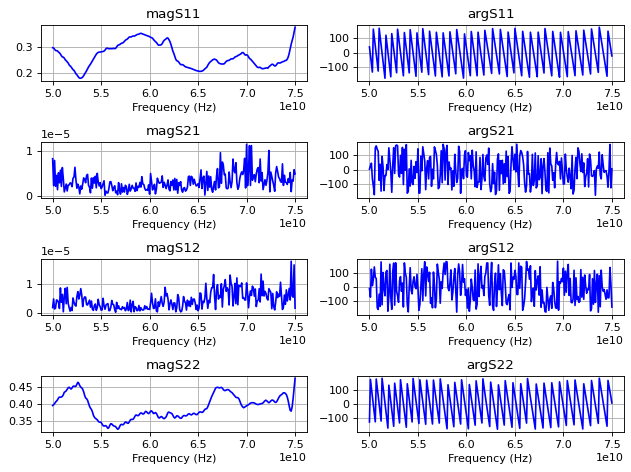

In [3]:
# to see a plot of the file use the show method
s2p.show();

## Opening the calibration

In [4]:
# now open the correction s4p. This can be found in the VNAUncert_results/Solutions folder after running the MUF
s4p=SNP(r"./Applying_Calibration_Example_Files/Solution_0.s4p")

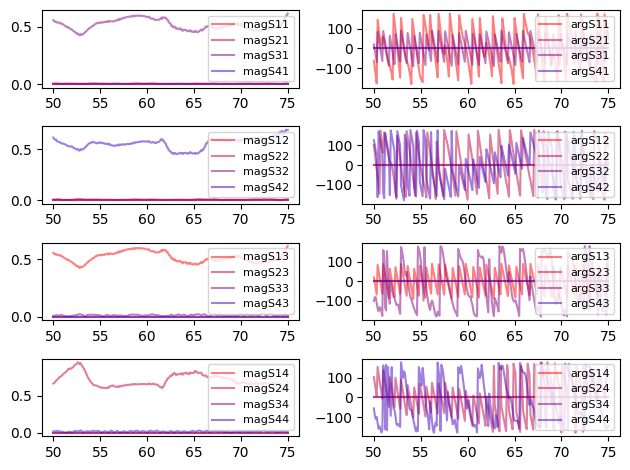

In [5]:
# to plot use the show method
s4p.show();

## Applying the correction

In [7]:
# now apply the correction. Here we are correcting the complex data so we acess the complex numbers directly
# This style is better than applying the correction using the s4p and s2p objects directly because it allows
# for corrections with out presuming a starting style except 2d-lists of complex numbers
corrected_sparameters=correct_sparameters_sixteen_term(sixteen_term_correction=s4p.sparameter_complex,
                                                       sparameters_complex=s2p.sparameter_complex)

## Creating a new s2p for the corrected data

In [8]:
# now we put these into a new s2p object
# The None parameter specifies a new file 
corrected_s2p=S2PV1(None,sparameter_complex=corrected_sparameters)

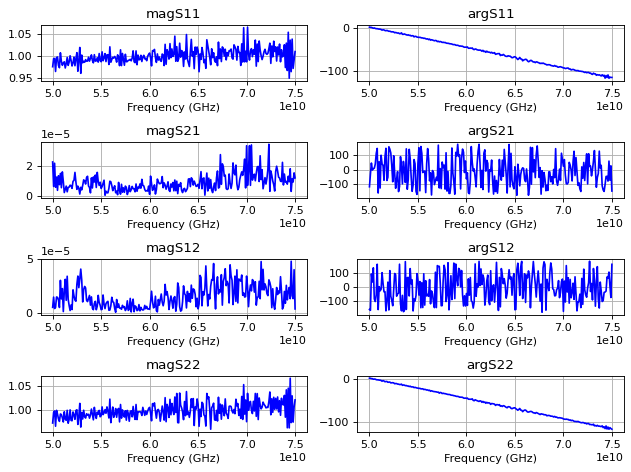

In [9]:
# now we have a file with corrected sparameters, that we can show or save 
corrected_s2p.show();

In [10]:
# Now we can save the file. To find the default file name inspect the path attribute. 
corrected_s2p.path

'Two_Port_Sparameter_20250409_001.s2p'

In [11]:
# to save as another name just enter the new path 
corrected_s2p.save(r'./Applying_Calibration_Example_Files/corrected_s2p.s2p')